In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Mall_Customers.csv")


In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.rename(index=str, columns={'Annual Income (k$)': 'A_Income',
                            'Spending Score (1-100)': 'Score'}, inplace=True)

In [6]:
new_data = data.drop(['CustomerID', 'Gender'], axis=1)

In [7]:
new_data.head()

,Age,A_Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [8]:
data.head()

,CustomerID,Gender,Age,A_Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data.describe()

,CustomerID,Age,A_Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
data.isnull().sum()

CustomerID    0
Gender        0
Age           0
A_Income      0
Score         0
dtype: int64

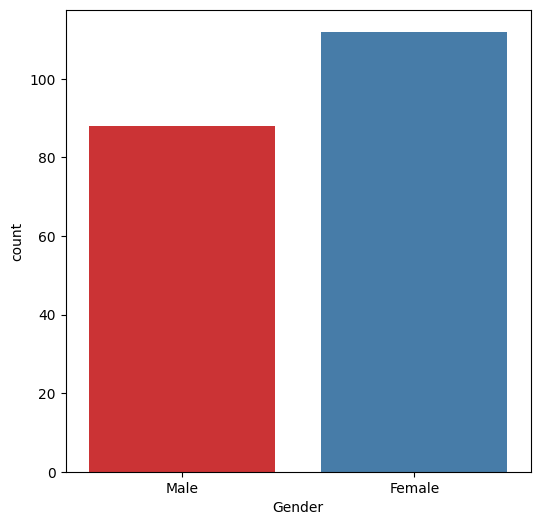

In [11]:
plt.figure(1 , figsize = (6 , 6))
sns.countplot(x = 'Gender' , data = data, palette='Set1')
plt.show()

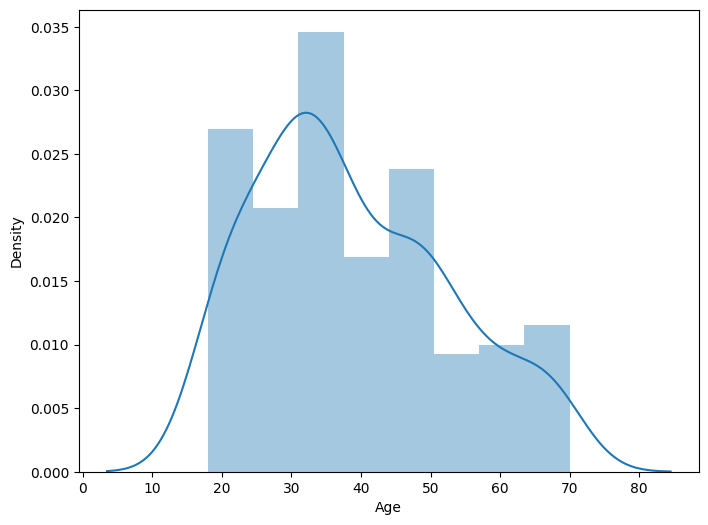

In [12]:
plt.figure(figsize=(8, 6))
sns.distplot(data["Age"])
plt.xlabel("Age")
plt.show()

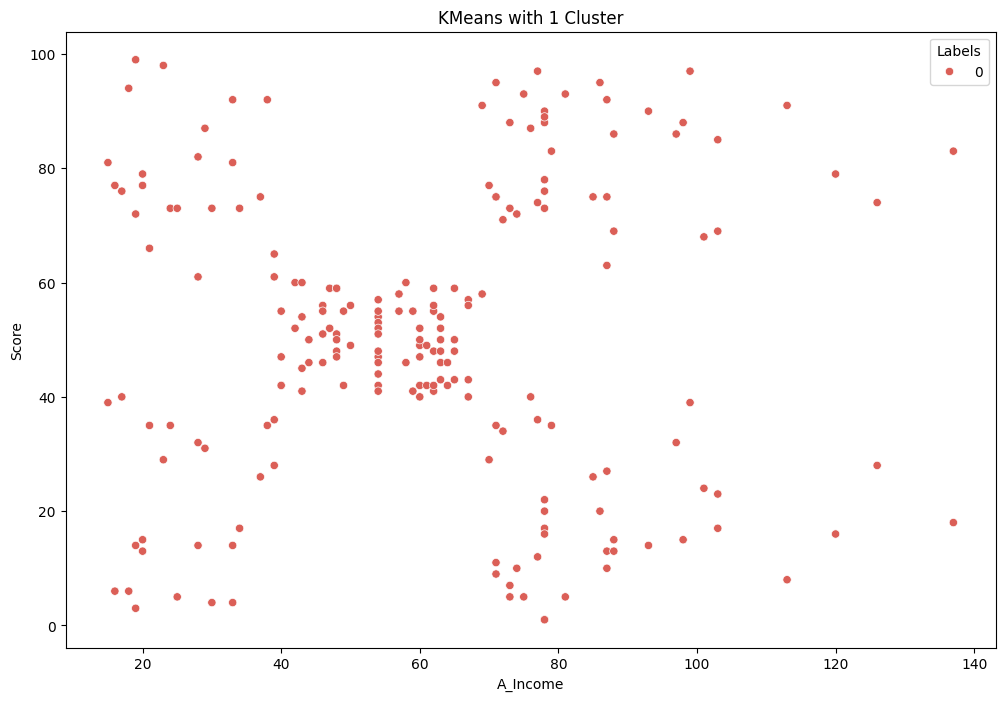

In [13]:
# 1 cluster
km1 = KMeans(n_clusters = 1).fit(new_data)

new_data['Labels'] = km1.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = new_data['A_Income'], y = new_data['Score'], hue=new_data['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 1 Cluster')
plt.show()

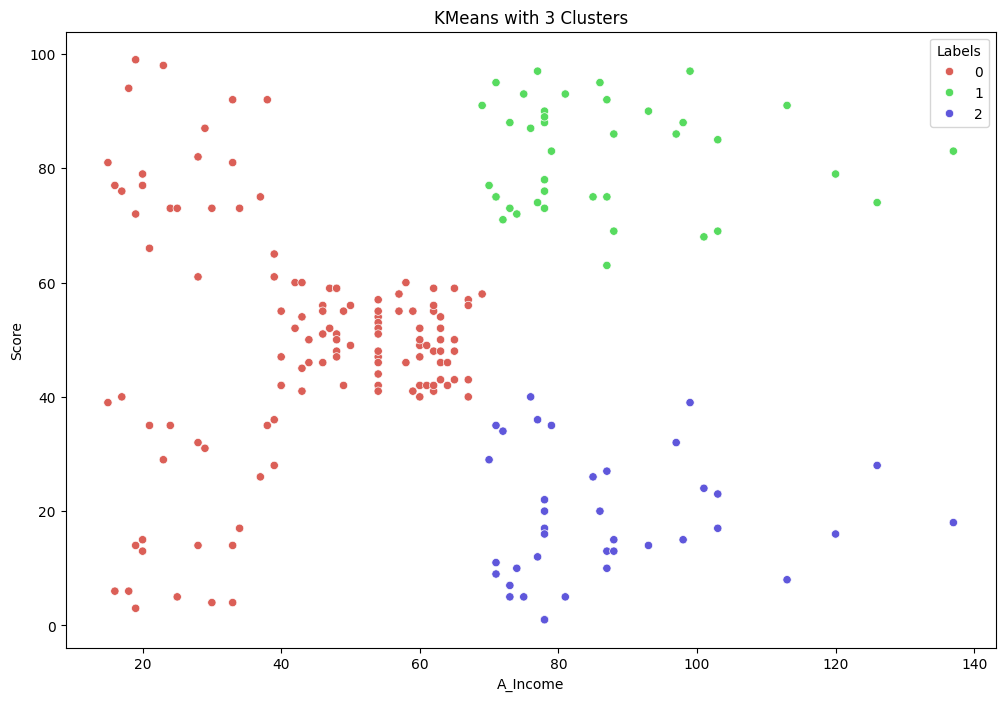

In [14]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(new_data)

new_data['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = new_data['A_Income'], y = new_data['Score'], hue=new_data['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

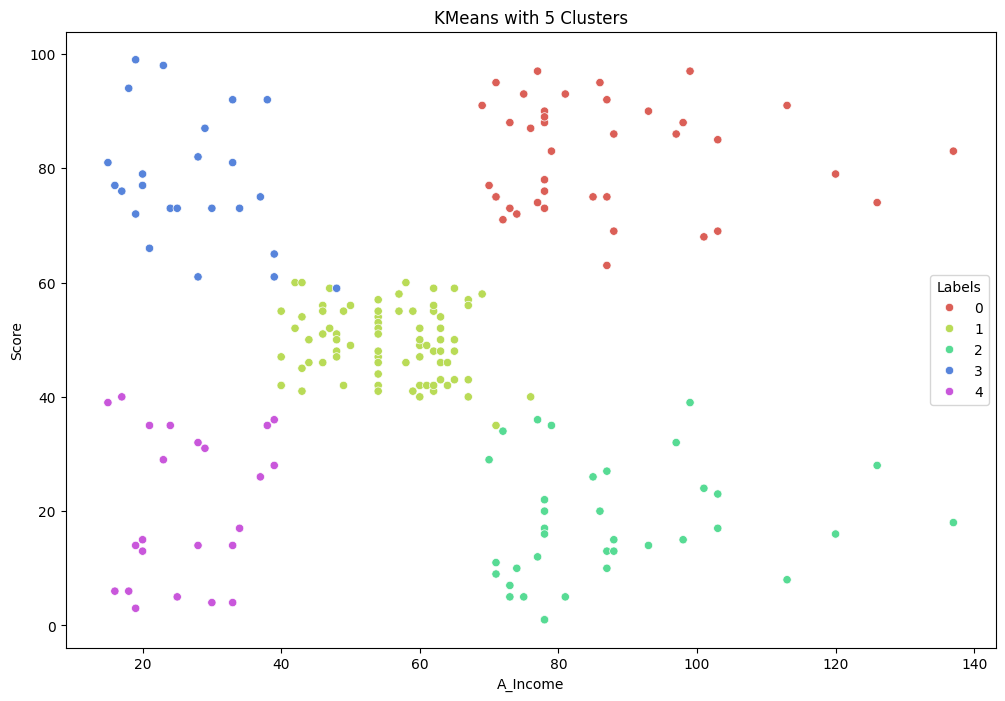

In [15]:
# Let's see with 5 Clusters
km5 = KMeans(n_clusters=5).fit(new_data)

new_data['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(x = new_data['A_Income'], y = new_data['Score'], hue=new_data['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

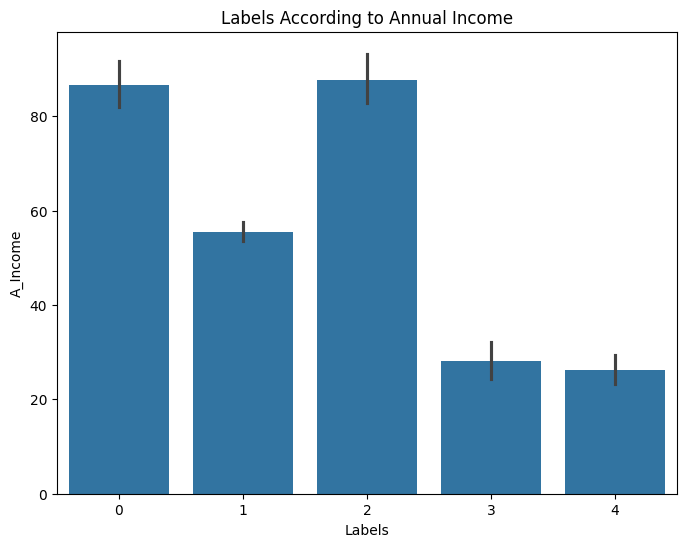

In [16]:
fig, axes = plt.subplots(figsize=(8, 6))

# Bar plot for Annual Income
sns.barplot(x='Labels', y='A_Income', data=new_data)
axes.set_title('Labels According to Annual Income')

plt.show()

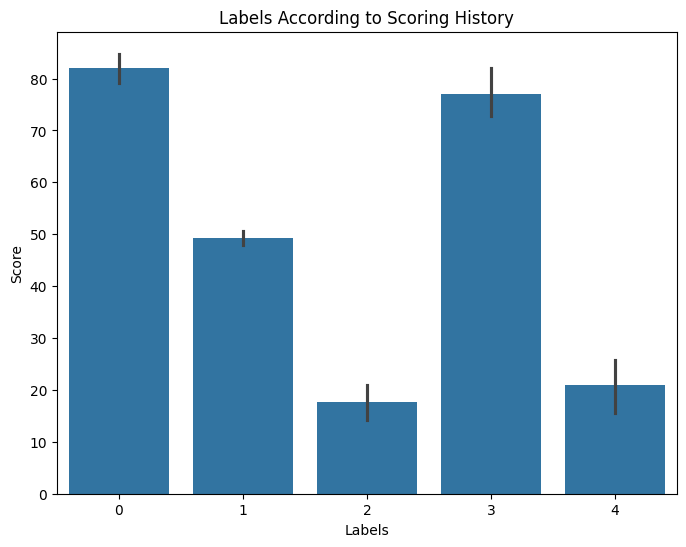

In [17]:
# Bar plot for Scoring History
fig, axes = plt.subplots(figsize=(8, 6))
sns.barplot(x='Labels', y='Score', data=new_data)
axes.set_title('Labels According to Scoring History')
plt.show()

In [18]:
X1 = data[['Age' , 'Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=100, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

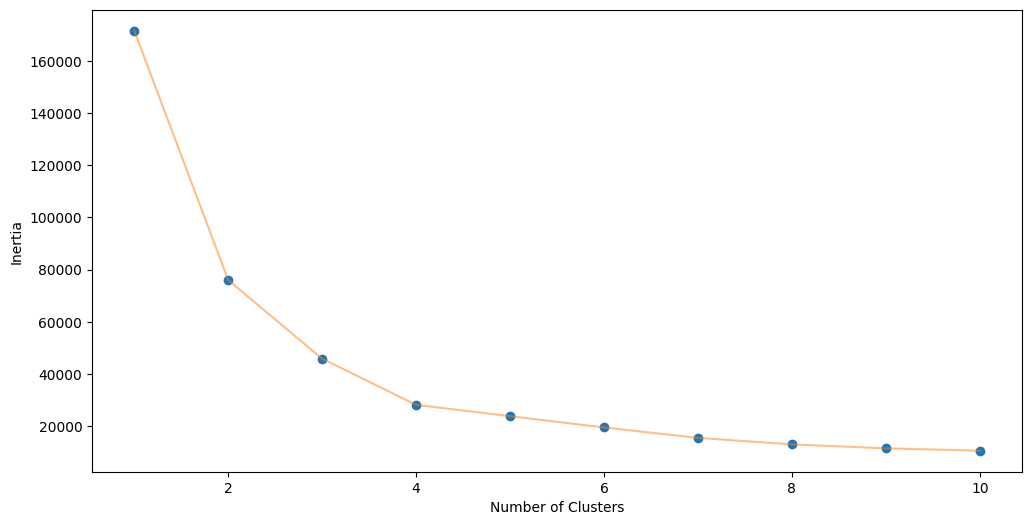

In [19]:
plt.figure(1 , figsize = (12 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [20]:
X2 = data[['A_Income' , 'Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

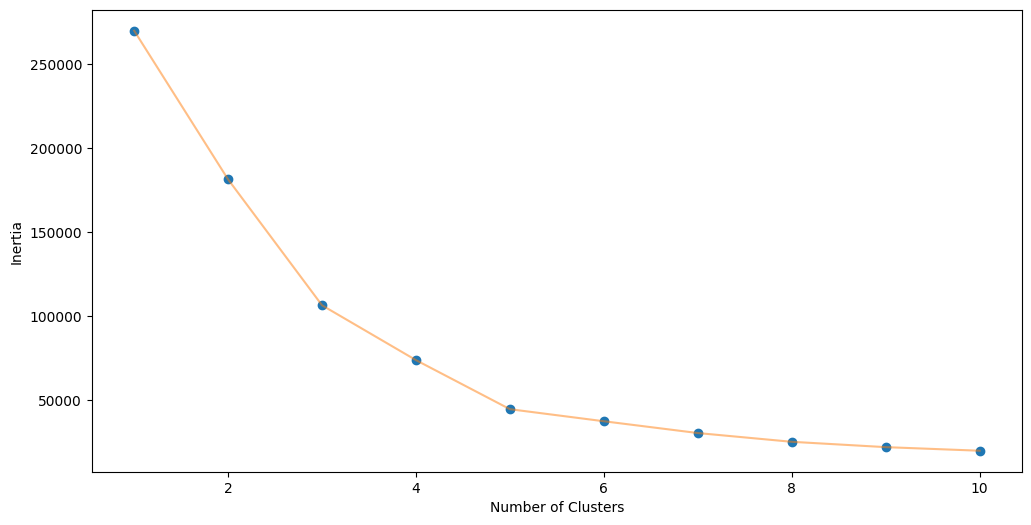

In [21]:
plt.figure(1 , figsize = (12, 6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [22]:
X3 = data[['Age', 'A_Income', 'Score']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=100, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

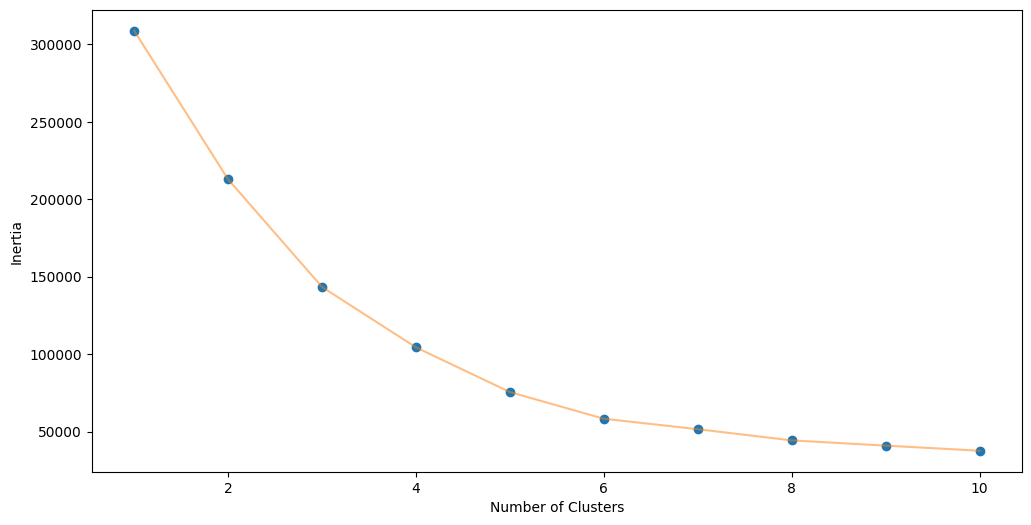

In [23]:
plt.figure(1 , figsize = (12 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()